In [1]:
import numpy as np   # Importo paquete de álgebra lineal
import matplotlib.pyplot as plt   # Importo paquete de gráficos
import math   # Importo paquete de funciones matemáticas
import random   # Importo paquete para generar números pseudoaleatorios

## Problema 3

a) Un paracaidista de $m = 70\ kg$ salta desde un globo aerostático fijo. El coeficiente de resistencia del aire es de aproximadamente $\gamma = 12,5\ kg/s$. (Tome la aceleración de la gravedad como $g = 10\ m/s^2$). Utilizando la expresión exacta, evalúe la velocidad del paracaidista cada $2\ s$ después del salto y calcule su velocidad límite. Grafique el resultado.

b) Repita el gráfico con la solución discreta, tomando intervalos de $2\ s$, $1\ s$ y $0,5\ s$.

c) Haga el mismo cálculo pero suponiendo ahora que la fuerza de rozamiento se debe expresar como $F_r = – k v^2$ (tome $k = 0,25\ kg/m$).

In [2]:
# Defino la masa "m" del paracaidista.
m = 70   # [m] = kg
# Defino la gravedad "g".
g = 10   # [g] = m/s^2
# Defino el coeficiente de resistencia del aire "gamma", para los INCISOS a) y b).
gamma = 12.5   # [gamma] = kg/s
# Defino el coeficiente de resistencia del aire "k", para el INCISO c).
k = 0.25   # [k] = kg/m

### Inciso a)

Se plantea la segunda ley de Newton, con un término de rozamiento:
\begin{equation}
m \frac{dv}{dt} = mg - \gamma v
\end{equation}
Teniendo en cuenta que el globo aerostático está fijo, se tiene la condición $v_o = 0\ m/s$. La solución de esta ecuación diferencial resulta ser la siguiente:
\begin{equation}
v = \frac{gm}{\gamma} \left(1 - e^{-\left(\gamma/m\right) t}\right)
\end{equation}
, siendo $v_L = \frac{gm}{\gamma}$ la velocidad límite.

In [3]:
# Defino función para calcular la velocidad "v1" en función del tiempo "t".
def v1(t):
    v = (g*m/gamma) * (1 - math.exp(-gamma*t/m))
    return v

In [4]:
# Defino tiempo inicial "a".
a = 0   # [a] = s
# Defino tiempo final "b" (MODIFICAR si no es suficiente).
b = 40   # [b] = s

In [5]:
# Defino incremento de tiempo "dt1" cada cuanto se evaluará la velocidad.
dt1 = 2   # [dt1] = s

In [6]:
# Defino vector "tiempo1", tal que "tiempo1[0] = a", "tiempo1[-1] = b" y "tiempo1[i+1] - tiempo1[i] = dt1".
tiempo1 = [a]
while tiempo1[-1]!=b:
    tiempo1.append(tiempo1[-1] + dt1)

In [7]:
# Defino el vector de velocidades "vel1", empleando la función "v1" y evaluándola en "tiempo1".
vel1 = [v1(p) for p in tiempo1]

In [8]:
# Calculo la velocidad límite "vlim1".
vlim1 = g*m/gamma
print('La velocidad límite es ', vlim1, ' m/s')

La velocidad límite es  56.0  m/s


In [9]:
# Defino vector "vlim_1" de "len(tiempo1)" componentes, para poder realizar un gráfico.
vlim_1 = np.zeros(len(tiempo1))
for i in range(0,len(tiempo1)):
    vlim_1[i] = vlim1

Text(0.5, 1.0, 'Velocidad paracaidista, inciso a)')

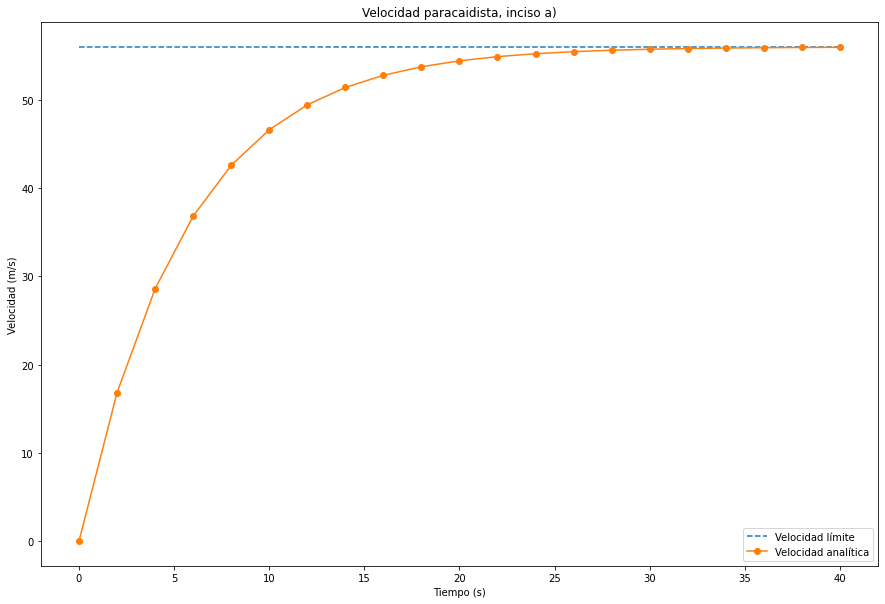

In [10]:
# Gráfico.
plt.figure(figsize=(15,10))
plt.plot(tiempo1, vlim_1, linestyle = 'dashed', label = 'Velocidad límite')
plt.plot(tiempo1, vel1, 'o-', label = 'Velocidad analítica')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad paracaidista, inciso a)')

### Inciso b)

Se plantea la segunda ley de Newton, con un término de rozamiento:
\begin{equation}
m \frac{dv}{dt} = mg - \gamma v
\end{equation}
Se divide por $m$ miembro a miembro y se discretiza la expresión:
\begin{equation}
\frac{dv}{dt} = g - \frac{\gamma}{m} v \hspace {0.5cm} \rightarrow \hspace {0.5cm} \frac{v_{i+1} - v_i}{\Delta t} = g - \frac{\gamma}{m} v_i
\end{equation}
La expresión final es la siguiente:
\begin{equation}
v_{i+1} = v_i + \left[g - \frac{\gamma}{m} v_i\right] \Delta t
\end{equation}

In [11]:
# Defino tiempo inicial "c".
c = 0   # [c] = s
# Defino tiempo final "d" (MODIFICAR si no es suficiente).
d = 40   # [d] = s

In [12]:
# Defino incrementos de tiempo "dt2", "dt3" y "dt4" cada cuanto se evaluará la velocidad discretizada.
dt2 = 2   # [dt2] = s
dt3 = 1   # [dt3] = s
dt4 = 0.5   # [dt4] = s

In [13]:
# Defino vector "tiempo2", tal que "tiempo2[0] = c", "tiempo2[-1] = d" y "tiempo2[i+1] - tiempo2[i] = dt2".
tiempo2 = [c]
while tiempo2[-1]!=d:
    tiempo2.append(tiempo2[-1] + dt2)

In [14]:
# Defino el vector de velocidades "vel2" de "len(tiempo2)" componentes.
vel2 = [0]
for i in range(1,len(tiempo2)):
    vel2.append(vel2[-1]+(g-(gamma/m)*vel2[-1])*dt2)

In [15]:
# Defino vector "tiempo3", tal que "tiempo3[0] = c", "tiempo3[-1] = d" y "tiempo3[i+1] - tiempo3[i] = dt3".
tiempo3 = [c]
while tiempo3[-1]!=d:
    tiempo3.append(tiempo3[-1] + dt3)

In [16]:
# Defino el vector de velocidades "vel3" de "len(tiempo3)" componentes.
vel3 = [0]
for i in range(1,len(tiempo3)):
    vel3.append(vel3[-1]+(g-(gamma/m)*vel3[-1])*dt3)

In [17]:
# Defino vector "tiempo4", tal que "tiempo4[0] = c", "tiempo4[-1] = d" y "tiempo4[i+1] - tiempo4[i] = dt4".
tiempo4 = [c]
while tiempo4[-1]!=d:
    tiempo4.append(tiempo4[-1] + dt4)

In [18]:
# Defino el vector de velocidades "vel4" de "len(tiempo4)" componentes.
vel4 = [0]
for i in range(1,len(tiempo4)):
    vel4.append(vel4[-1]+(g-(gamma/m)*vel4[-1])*dt4)

Text(0.5, 1.0, 'Velocidad paracaidista, inciso b)')

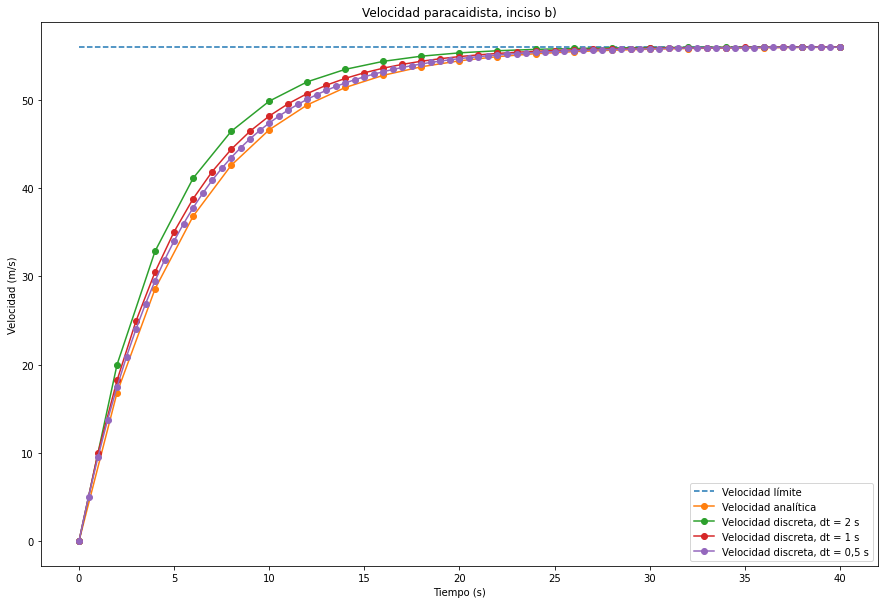

In [19]:
# Gráfico.
plt.figure(figsize=(15,10))
plt.plot(tiempo1, vlim_1, linestyle = 'dashed', label = 'Velocidad límite')
plt.plot(tiempo1, vel1, 'o-', label = 'Velocidad analítica')
plt.plot(tiempo2, vel2, 'o-', label = 'Velocidad discreta, dt = 2 s')
plt.plot(tiempo3, vel3, 'o-', label = 'Velocidad discreta, dt = 1 s')
plt.plot(tiempo4, vel4, 'o-', label = 'Velocidad discreta, dt = 0,5 s')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad paracaidista, inciso b)')

### Inciso c)

Se plantea la segunda ley de Newton, con un término de rozamiento que es proporcional al cuadrado de la velocidad:
\begin{equation}
m \frac{dv}{dt} = mg - k v^2
\end{equation}
En un momento, el peso igualará a la fuerza de rozamiento y se alcanzará la velocidad límite $v_L$.
\begin{equation}
k v_L^2 = mg \hspace {0.5cm} \rightarrow \hspace {0.5cm} v_L = \sqrt{\frac{mg}{k}}
\end{equation}
Se divide por $m$ miembro a miembro. Teniendo en cuenta que el globo aerostático está fijo, se tiene la condición $v_o = 0\ m/s$. Además, se considera $t_o = 0\ s$. Debe resolverse lo siguiente:
\begin{equation}
\int_0^v \frac{dv}{g - \frac{k}{m} v^2} = \int_0^t dt
\end{equation}
La expresión final es la siguiente:
\begin{equation}
v = v_L \frac{e^\left(\frac{k v_L}{m} t\right) - e^\left(-\frac{k v_L}{m} t\right)}{e^\left(\frac{k v_L}{m} t\right) + e^\left(-\frac{k v_L}{m} t\right)}
\end{equation}

In [20]:
# Calculo la velocidad límite "vlim2".
vlim2 = np.sqrt(m*g/k)
print('La velocidad límite es ', vlim2, ' m/s')

La velocidad límite es  52.91502622129181  m/s


In [21]:
# Defino función para calcular la velocidad "v2" en función del tiempo "t".
def v2(t):
    v = vlim2*((np.exp(k*vlim2*t/m) - np.exp(-k*vlim2*t/m)) / (np.exp(k*vlim2*t/m) + np.exp(-k*vlim2*t/m)))
    return v

In [22]:
# Defino tiempo inicial "e".
e = 0   # [e] = s
# Defino tiempo final "f" (MODIFICAR si no es suficiente).
f = 40   # [f] = s

In [23]:
# Defino incremento de tiempo "dt5" cada cuanto se evaluará la velocidad.
dt5 = 2   # [dt5] = s

In [24]:
# Defino vector "tiempo5", tal que "tiempo5[0] = e", "tiempo5[-1] = f" y "tiempo5[i+1] - tiempo5[i] = dt5".
tiempo5 = [e]
while tiempo5[-1]!=f:
    tiempo5.append(tiempo5[-1] + dt5)

In [25]:
# Defino el vector de velocidades "vel5", empleando la función "v2" y evaluándola en "tiempo5".
vel5 = [v2(p) for p in tiempo5]

In [26]:
# Defino vector "vlim_2" de "len(tiempo5)" componentes, para poder realizar un gráfico.
vlim_2 = np.zeros(len(tiempo5))
for i in range(0,len(tiempo5)):
    vlim_2[i] = vlim2

Text(0.5, 1.0, 'Velocidad paracaidista, inciso c)')

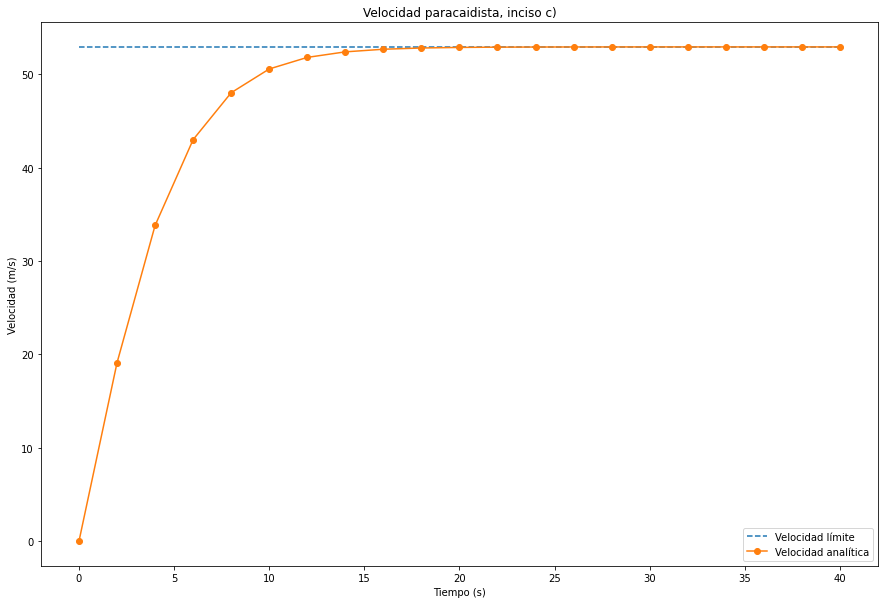

In [27]:
# Gráfico.
plt.figure(figsize=(15,10))
plt.plot(tiempo5, vlim_2, linestyle = 'dashed', label = 'Velocidad límite')
plt.plot(tiempo5, vel5, 'o-', label = 'Velocidad analítica')
plt.legend()
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Velocidad paracaidista, inciso c)')